In [1]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.layers import Flatten, Dense, Dropout, Activation
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

Mounted at /content/drive


In [2]:
drive.mount('/content/drive',force_remount=True)
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1./255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)

train=train_datagen.flow_from_directory('/content/drive/MyDrive/Food_train/train',
                                               target_size=(256,256),
                                               batch_size=32,
                                               class_mode ='categorical')
test=train_datagen.flow_from_directory('/content/drive/MyDrive/Food_train/test',
                                               target_size=(256,256),
                                               batch_size=32,
                                               class_mode ='categorical')

Mounted at /content/drive
Found 100 images belonging to 10 classes.
Found 30 images belonging to 3 classes.


In [3]:
 #Dat ten cho cac classes
classes = ['Pho', 'BunBoHue', 'ComTam', 'MiQuang', 'BunMoc', 'BunChaCa', 'MamTom', 'GoiCuon', 'ChaoLong', 'HuTieu']

In [4]:
model=Sequential()
#model CNN

# input
model.add(Conv2D(128,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same',input_shape=(256,256,3)))
model.add(MaxPooling2D(pool_size=(2,2)))
# 1
model.add(Conv2D(64,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same'))
model.add(MaxPooling2D((2,2)))
# 2
model.add(Conv2D(32,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same'))
model.add(MaxPooling2D((2,2)))
# 3
model.add(Conv2D(32,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same'))
model.add(MaxPooling2D((2,2)))
# output
model.add(Flatten())
model.add(Dense(128,activation='relu',kernel_initializer = 'he_uniform'))
model.add(Dense(10,activation='Softmax'))

from tensorflow.keras.optimizers import SGD
from tensorflow.keras.callbacks import EarlyStopping

opt = SGD(lr = 0.01, momentum = 0.9)
model.compile(optimizer = 'adam', loss ='categorical_crossentropy',metrics = ['accuracy'])
callbacks=[EarlyStopping(monitor='val_loss',patience=100)]

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


In [8]:
history=model.fit(train,steps_per_epoch=len(train),epochs=100,batch_size=64,verbose=1,
                  callbacks=[EarlyStopping(monitor='val_loss',patience=50)])

Epoch 1/100
4/4 [==============================] - 2s 348ms/step - loss: 0.2459 - accuracy: 0.9500
Epoch 2/100
4/4 [==============================] - 2s 386ms/step - loss: 0.1736 - accuracy: 0.9600
Epoch 3/100
4/4 [==============================] - 2s 561ms/step - loss: 0.2232 - accuracy: 0.9100
Epoch 4/100
4/4 [==============================] - 2s 389ms/step - loss: 0.2181 - accuracy: 0.9200
Epoch 5/100
4/4 [==============================] - 2s 544ms/step - loss: 0.3110 - accuracy: 0.8900
Epoch 6/100
4/4 [==============================] - 2s 549ms/step - loss: 0.1003 - accuracy: 0.9900
Epoch 7/100
4/4 [==============================] - 2s 547ms/step - loss: 0.1464 - accuracy: 0.9700
Epoch 8/100
4/4 [==============================] - 2s 356ms/step - loss: 0.1026 - accuracy: 0.9700
Epoch 9/100
4/4 [==============================] - 2s 358ms/step - loss: 0.1292 - accuracy: 0.9500
Epoch 10/100
4/4 [==============================] - 2s 379ms/step - loss: 0.0977 - accuracy: 0.9800
Epoch 11/

In [9]:
model.save('Food_CNN.h5')

In [10]:
from keras.models import load_model
models = load_model('Food_CNN.h5')

In [12]:
score = model.evaluate(train,verbose=1)
print('Train loss= ', score[0])
print('Train accuracy= ', score[1])

4/4 [==============================] - 2s 476ms/step - loss: 0.1636 - accuracy: 0.9300
Train loss=  0.16357925534248352
Train accuracy=  0.9300000071525574


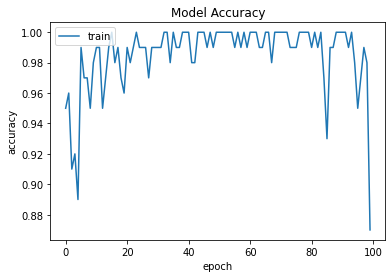

In [14]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','validation'], loc='upper left')

MamTom


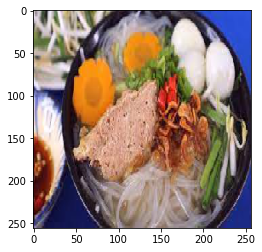

In [22]:
from tensorflow.keras.utils import load_img, img_to_array
import numpy as np

img = load_img('/content/03.jpg',target_size=(256,256))
plt.imshow(img)
img = img_to_array(img)
img=img.reshape(1,256,256,3)
img=img.astype('float32')
img = img/255
print(classes[np.argmax(model.predict(img))])

GoiCuon


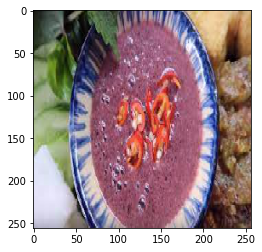

In [24]:
from tensorflow.keras.utils import load_img, img_to_array
import numpy as np

img = load_img('/content/01.jpg',target_size=(256,256))
plt.imshow(img)
img = img_to_array(img)
img=img.reshape(1,256,256,3)
img=img.astype('float32')
img = img/255
print(classes[np.argmax(model.predict(img))])

Pho


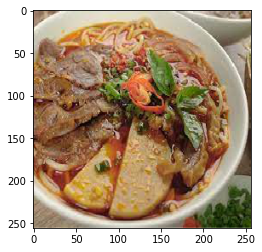

In [29]:
from tensorflow.keras.utils import load_img, img_to_array
import numpy as np

img = load_img('/content/04.jpg',target_size=(256,256))
plt.imshow(img)
img = img_to_array(img)
img=img.reshape(1,256,256,3)
img=img.astype('float32')
img = img/255
print(classes[np.argmax(model.predict(img))])